First 5 rows:
   Size (sq ft)  Location  Number of Rooms  Price (in ₹ Lakhs)
0           NaN     urban              3.0                85.0
1         950.0  suburban              2.0                60.0
2        1500.0     urban              4.0               110.0
3         800.0     rural              2.0                35.0
4        1750.0     urban              4.0               125.0

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (sq ft)        19 non-null     float64
 1   Location            20 non-null     object 
 2   Number of Rooms     19 non-null     float64
 3   Price (in ₹ Lakhs)  18 non-null     float64
dtypes: float64(3), object(1)
memory usage: 772.0+ bytes
None

Missing Values:
Size (sq ft)          1
Location              0
Number of Rooms       1
Price (in ₹ Lakhs)    2
dtype: int64

D

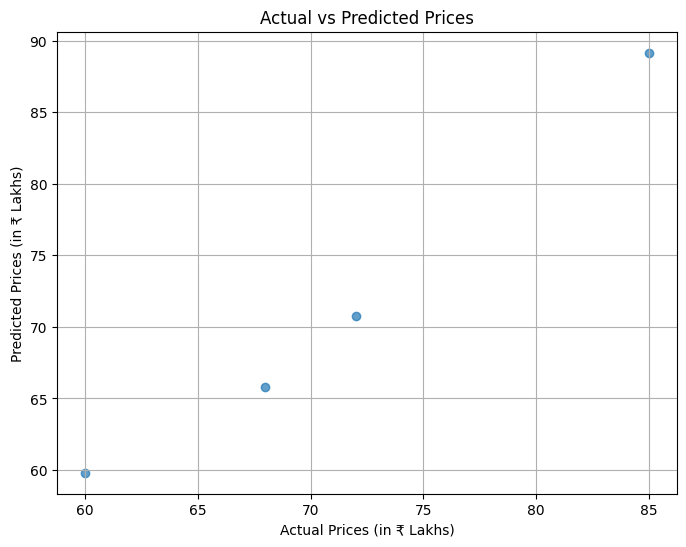

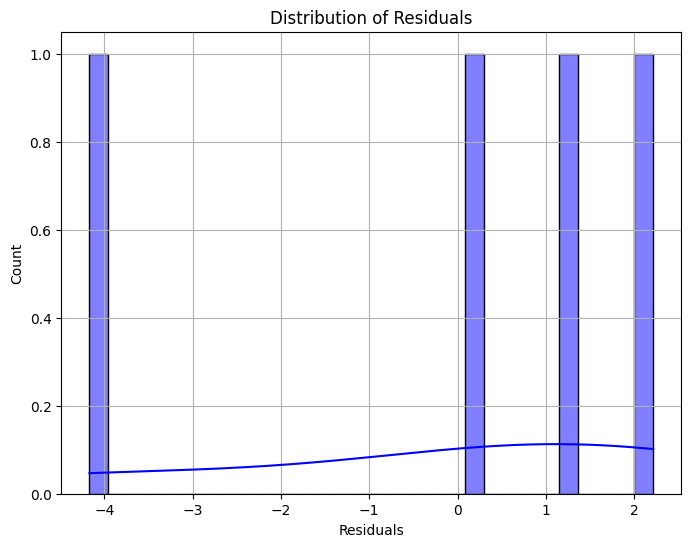

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('HOUSE_PRICES (2).csv')  


print("First 5 rows:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())


data['Size (sq ft)'] = data['Size (sq ft)'].fillna(data['Size (sq ft)'].median())
data['Number of Rooms'] = data['Number of Rooms'].fillna(data['Number of Rooms'].median())


data = data.dropna(subset=['Price (in ₹ Lakhs)'])


upper_limit = data['Price (in ₹ Lakhs)'].quantile(0.95)
data['Price (in ₹ Lakhs)'] = np.where(data['Price (in ₹ Lakhs)'] > upper_limit, upper_limit, data['Price (in ₹ Lakhs)'])


data = pd.get_dummies(data, columns=['Location'], drop_first=True)

print("\nDataset after encoding:")
print(data.head())


scaler = MinMaxScaler()
data[['Size (sq ft)', 'Number of Rooms']] = scaler.fit_transform(data[['Size (sq ft)', 'Number of Rooms']])


X = data.drop('Price (in ₹ Lakhs)', axis=1)
y = data['Price (in ₹ Lakhs)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


model = LinearRegression()
model.fit(X_train, y_train)


print("\nModel Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


y_pred = model.predict(X_test)

#RMSE and R² values for model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nRMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices (in ₹ Lakhs)")
plt.ylabel("Predicted Prices (in ₹ Lakhs)")
plt.grid(True)
plt.show()

# Plot: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.grid(True)
plt.show()
